<a href="https://colab.research.google.com/github/amandahaff/MAT422/blob/main/3_5%2C_3_6_HW_Haffner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3.5 K-Means##

k-means clustering is a popular method of vector quantization that aims to
partition n observations into k clusters in which each observation belongs
to the cluster with the nearest mean (cluster centers or cluster centroid),
serving as a prototype of the cluster. k-means clustering minimizes within-
cluster variances (squared Euclidean distances), but not regular Euclidean
distances.0

K-means Clustering Algorithm:
1. Clusters the data into k groups where k is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean
distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster
in consecutive rounds.

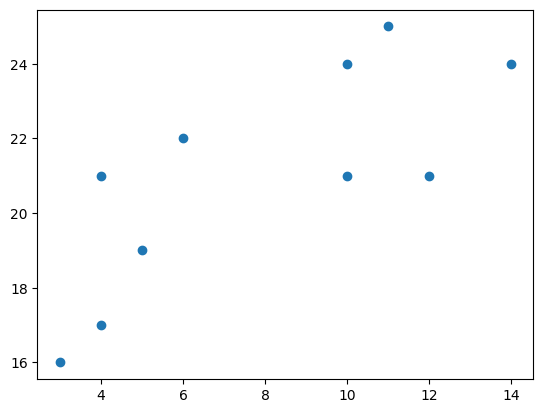

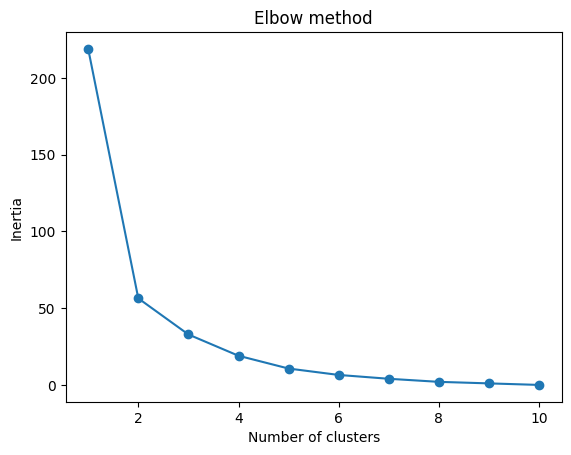

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


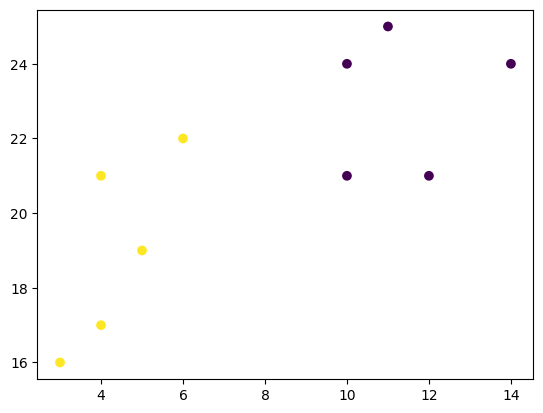

In [3]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)  # Set n_init explicitly
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

##3.6 Support Vector Machine##

Support-vector machines (SVMs) are supervised learning models in machine
learning, which aim to analyze data for classification and regression analy-
sis. Given a set of training examples, each marked as belonging to one of
two categories, an SVM training algorithm builds a model that assigns new
examples to one category or the other. The objective of the support vector
machine algorithm is to find a hyperplane in a high dimensional space of the
number of features that distinctly classifies the data points. An SVM maps
training examples to points in space so as to maximize the width of the gap
between the two categories. Predictions of new data are based on which side
of the gap they fall.

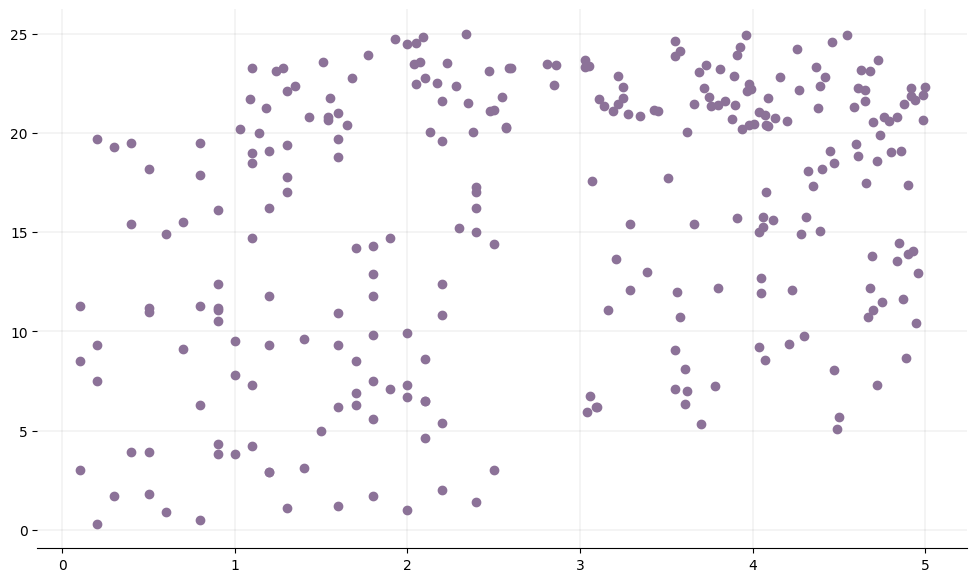

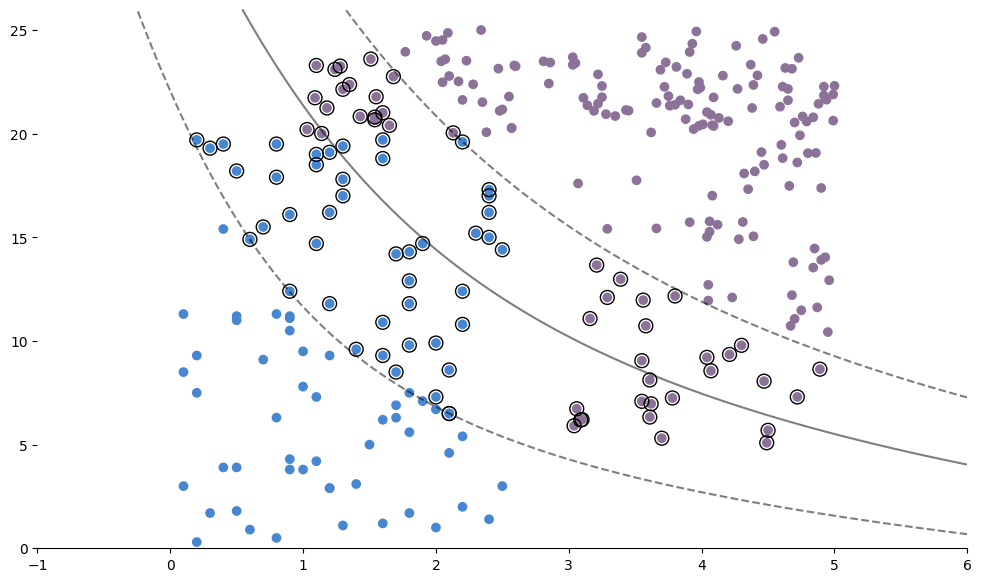

2nd degree polynomial Kernel
Accuracy (normalized): 1.0


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

    # Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(12, 7))
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))